# Задача: Сравнение методов классификации. Лямин Владимир Андреевич. Группа 22.М05
Задача
1. [+] Самостоятельно реализовать один из методов классификации, с возможностью настройки гиперпараметров.
2. [+] Взять данные для предсказания заболеваний сердца тут (целевой признак для предсказания --- target). Демо блакнот с анализом этих данных можно найти тут.
3. [+] Считать данные, выполнить первичный анализ данных, при необходимости произвести чистку данных (Data Cleaning).
4. [+] Выполнить разведочный анализ (EDA), использовать визуализацию, сделать выводы, которые могут быть полезны при дальнейшем решении задачи классификации.
5. [+] При необходимости выполнить полезные преобразования данных (например, трансформировать категариальные признаки в количественные), убрать ненужные признаки, создать новые (Feature Engineering).
6. [+] Используя подбор гиперпараметров, кросс-валидацию и при необходимости масштабирование данных, добиться наилучшего качества предсказания от Вашей реализации на выделенной заранее тестовой выборке.
7. [+] Повторить предыдущий пункт для библиотечных реализаций (например, из sklearn) всех пройденных методов классификации (logistic regression, svm, knn, naive bayes, decision tree).
8. [+] Сравнить все обученные модели, построить их confusion matrices. Сделать выводы о полученных моделях в рамках решения задачи классификации на выбранных данных.
9. (+2 балла) Реализовать еще один из методов классификации и добавить его в сравнение.
10. (+2 балла) Найти данные, на которых интересно будет решать задачу классификации. Повторить все пункты задания на новых данных.


Рассмотрим датасет с данными по смерти от ковида, который можно скачать тут https://www.kaggle.com/datasets/meirnizri/covid19-dataset.

Описание датасета:
везде 1 означает true, 2 означает false
    
1. sex: женщина или мужчина (1, 2)
2. age: возраст пациента.
3. classification: результаты теста на ковид. Значения 1-3 означают, что у пациента диагностировали ковид в разной степени. 4 или выше означает, что пациент не является носителем ковида или что тест не дает результатов.
4. patient type: госпитализирован или нет.
5. pneumonia: есть ли у пациента воспаление воздухоносных мешков или нет.
6. diabetes: есть ли диабет или нет.
7. hypertension: есть ли гипертония или нет.
8. obesity: есть ли ожирение.
9. tobacco: курящий или нет.
10. medical unit: тип учреждения национальной системы здравоохранения, предоставившего помощь.
11. death: когда умер, если нет, то стоят девятки.

Необходимо решить задачу классификации и научиться предсказывать целовой признак selling_price. Сколько стоит автомобиль. 

In [156]:
import numpy as np 
import pandas as pd
import matplotlib.pyplot as plt
%matplotlib inline
import seaborn as sns

# устанавливаем точность чисел с плавающей точкой
%precision %.4f

import warnings
warnings.filterwarnings('ignore')  # отключаем предупреждения

In [157]:
df = pd.read_csv('covid.csv')

In [158]:
df.drop(['Unnamed: 0'], axis=1, inplace=True)

In [159]:
df.head()

,MEDICAL_UNIT,SEX,PATIENT_TYPE,DATE_DIED,PNEUMONIA,AGE,DIABETES,HIPERTENSION,OBESITY,TOBACCO,CLASIFFICATION_FINAL
0,1,1,1,03/05/2020,1,65,2,1,2,2,3
1,1,2,1,03/06/2020,1,72,2,1,1,2,5
2,1,2,2,09/06/2020,2,55,1,2,2,2,3
3,1,1,1,12/06/2020,2,53,2,2,2,2,7
4,1,2,1,21/06/2020,2,68,1,1,2,2,3


Так как данных очень много, то выберем каждого двадцатого.

In [160]:
df_2 = pd.DataFrame()
for index, row in df.iterrows ():
    if (index % 20 == 0):
        df_2 = df_2.append(row, ignore_index=True)
    if (index % 100000 == 0):
        print(index)

0
100000
200000
300000
400000
500000
600000
700000
800000
900000
1000000


In [161]:
print(len(df_2))
df_2.head()


52429


,MEDICAL_UNIT,SEX,PATIENT_TYPE,DATE_DIED,PNEUMONIA,AGE,DIABETES,HIPERTENSION,OBESITY,TOBACCO,CLASIFFICATION_FINAL
0,1.0,1.0,1.0,03/05/2020,1.0,65.0,2.0,1.0,2.0,2.0,3.0
1,1.0,2.0,2.0,9999-99-99,1.0,59.0,1.0,2.0,2.0,1.0,3.0
2,1.0,1.0,1.0,9999-99-99,2.0,37.0,2.0,2.0,2.0,2.0,3.0
3,1.0,1.0,2.0,9999-99-99,2.0,25.0,2.0,2.0,2.0,2.0,7.0
4,1.0,1.0,1.0,9999-99-99,2.0,23.0,2.0,2.0,2.0,2.0,7.0


In [162]:
df_2.isnull().sum()

MEDICAL_UNIT            0
SEX                     0
PATIENT_TYPE            0
DATE_DIED               0
PNEUMONIA               0
AGE                     0
DIABETES                0
HIPERTENSION            0
OBESITY                 0
TOBACCO                 0
CLASIFFICATION_FINAL    0
dtype: int64

Видим, что пропущенных значений нет

## Разведочный анализ (EDA)

Посмотрим, какие занчения принмает дата смерти

In [163]:
df_2.DATE_DIED.value_counts()

9999-99-99    48580
13/07/2020       50
07/07/2020       49
06/07/2020       49
16/06/2020       49
              ...  
12/11/2020        1
28/01/2021        1
24/02/2021        1
31/01/2020        1
02/05/2021        1
Name: DATE_DIED, Length: 216, dtype: int64

Так как мы решаем задачу классификации, то сразу и создадим новый признак: умер пациет или нет.

In [166]:
df_2['survival'] = 0
for i in range(len(df_2.index)):
    if (df_2['DATE_DIED'][i] == "9999-99-99"):
        df_2['survival'][i] = 0
    else:
        df_2['survival'][i] = 1
    if (i % 100000 == 0):
        print(i)

0


In [167]:
df_2.to_csv('newCovid.csv')

Посмотрим сколько человек выжило, а сколько умерло от данной болезни

In [168]:
df_2.survival.value_counts()

0    48580
1     3849
Name: survival, dtype: int64

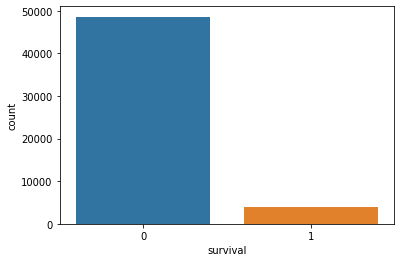

In [169]:
sns.countplot(x="survival", data=df_2)
plt.show()

Можно заметить, что выборка более-менее репрезентативна, так как колическво выживших значительно превышает количесво умерших. 

### Категориальный признак MEDICAL_UNIT

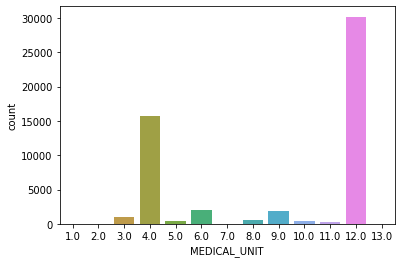

In [133]:
sns.countplot(x="MEDICAL_UNIT", data=df_2)
plt.show()

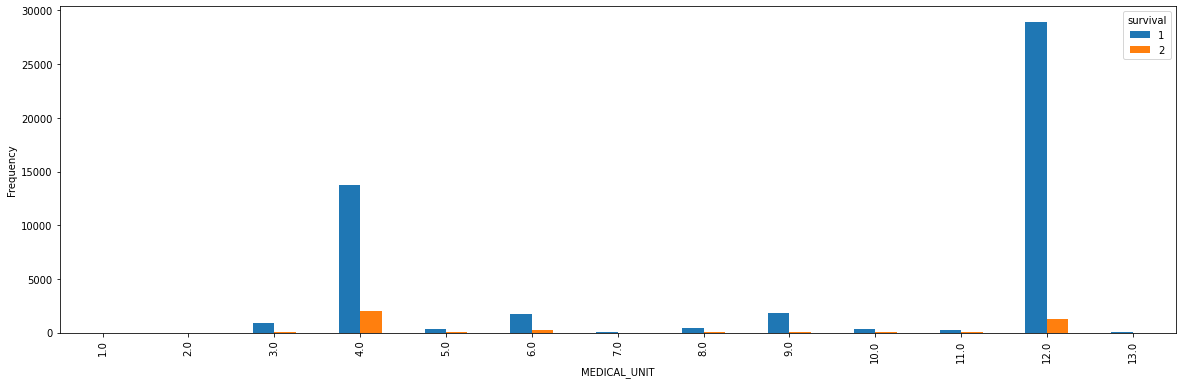

In [134]:
pd.crosstab(df_2.MEDICAL_UNIT,df_2.survival).plot(kind="bar", figsize=(20, 6))
plt.xlabel('MEDICAL_UNIT')
plt.ylabel('Frequency')
plt.show()

Можно заметить, что больные в основном поступали в медицинский учереждения типа 4 и 12. Притом сметроность в четвертом типе больше.

### Категориальный признак SEX

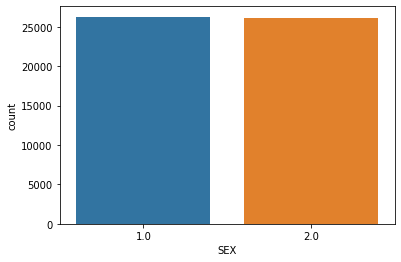

In [135]:
sns.countplot(x="SEX", data=df_2)
plt.show()

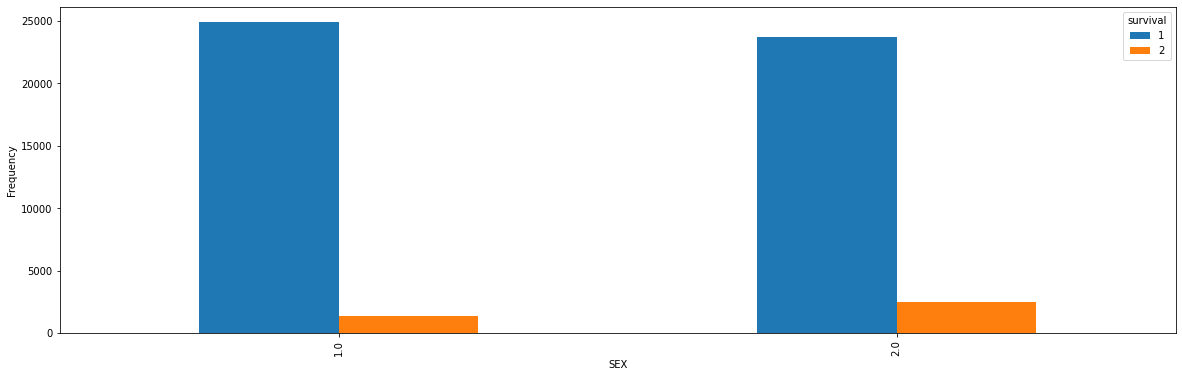

In [136]:
pd.crosstab(df_2.SEX,df_2.survival).plot(kind="bar", figsize=(20, 6))
plt.xlabel('SEX')
plt.ylabel('Frequency')
plt.show()

Можно заметить, что женщин и мужчин примерно одинаково, но смертность среди мужчин чуть больше.

### Категориальный признак PATIENT_TYPE

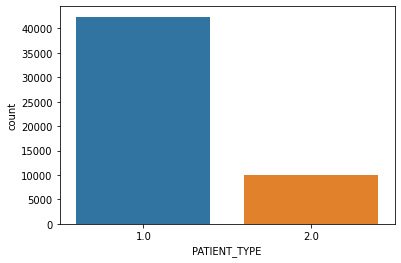

In [137]:
sns.countplot(x="PATIENT_TYPE", data=df_2)
plt.show()

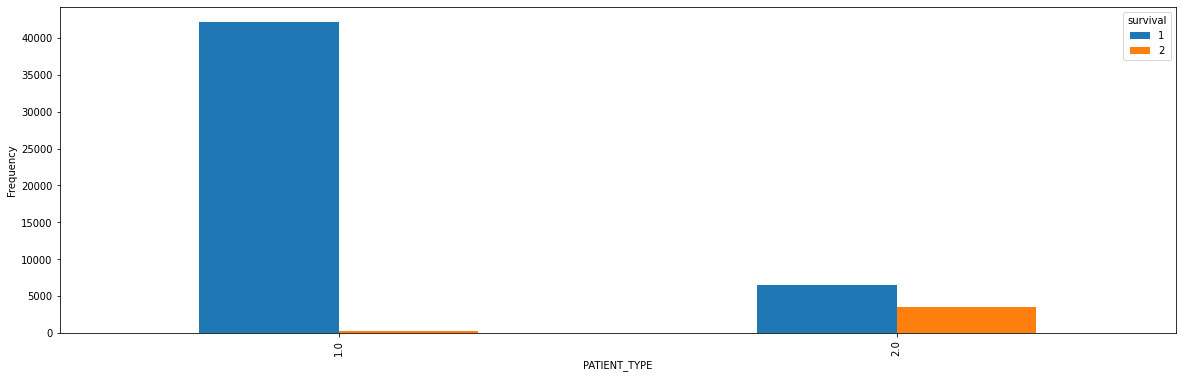

In [138]:
pd.crosstab(df_2.PATIENT_TYPE,df_2.survival).plot(kind="bar", figsize=(20, 6))
plt.xlabel('PATIENT_TYPE')
plt.ylabel('Frequency')
plt.show()

Можно заметить, что госпитализованные в основном выживали, в отличие от тех кто не был. Возможно, больницы просто не брали очень тяжелых, отдавая предпочтение более молодым и легким.

### Категориальный признак PNEUMONIA

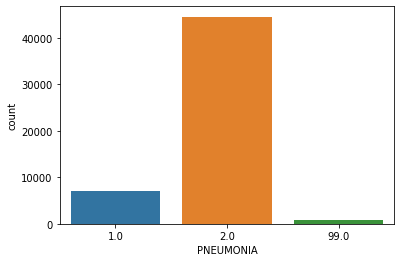

In [139]:
sns.countplot(x="PNEUMONIA", data=df_2)
plt.show()

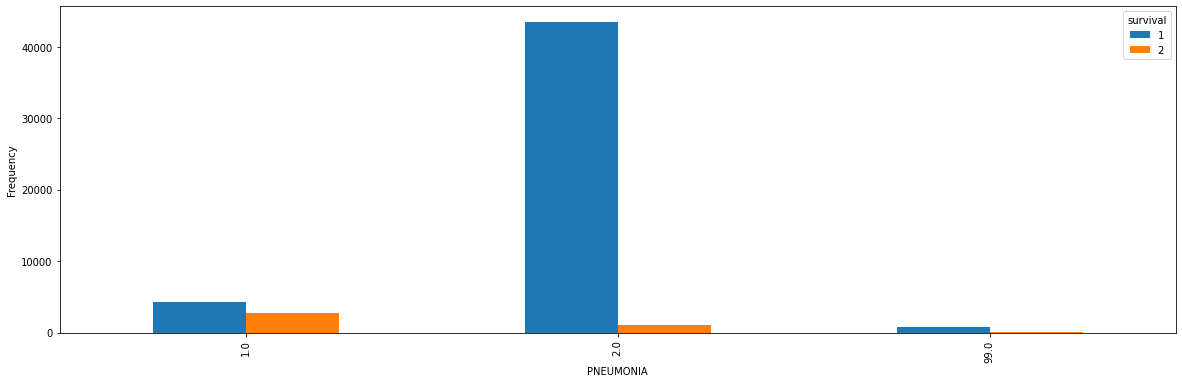

In [140]:
pd.crosstab(df_2.PNEUMONIA,df_2.survival).plot(kind="bar", figsize=(20, 6))
plt.xlabel('PNEUMONIA')
plt.ylabel('Frequency')
plt.show()

Можно увидеть, что пневмония увеличивает шансы умереть.

### Количесвенный признак AGE

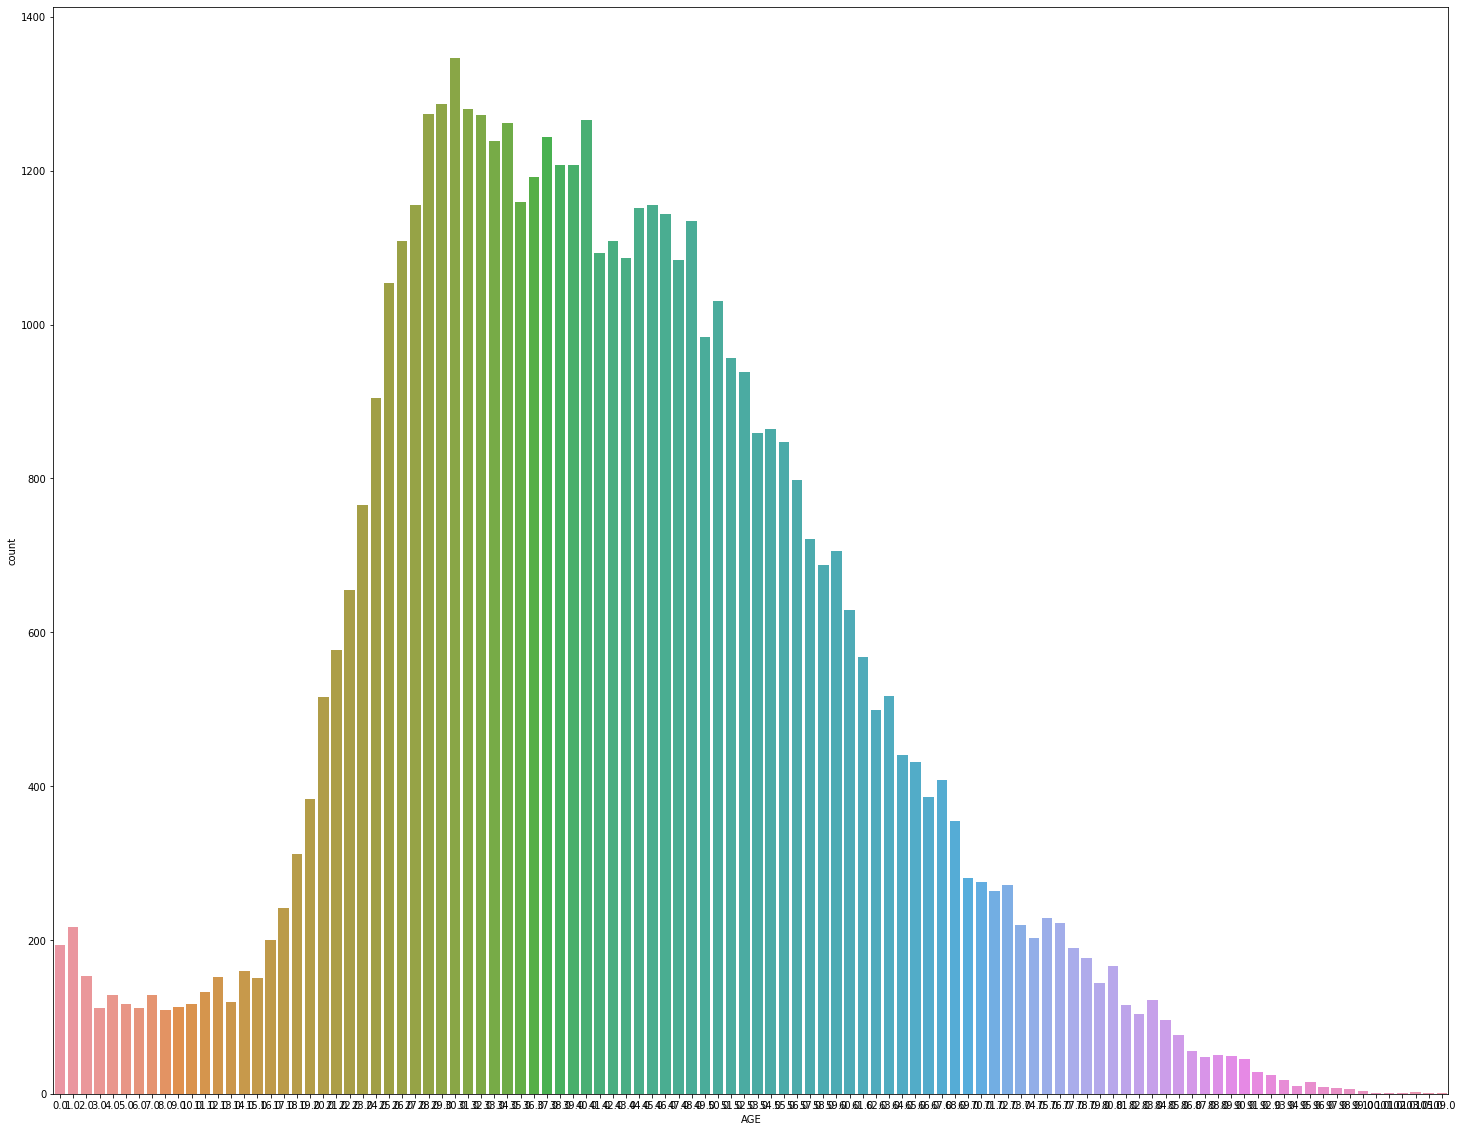

In [141]:
plt.figure(figsize=(25,20))
sns.countplot(x="AGE", data=df_2)
plt.show()

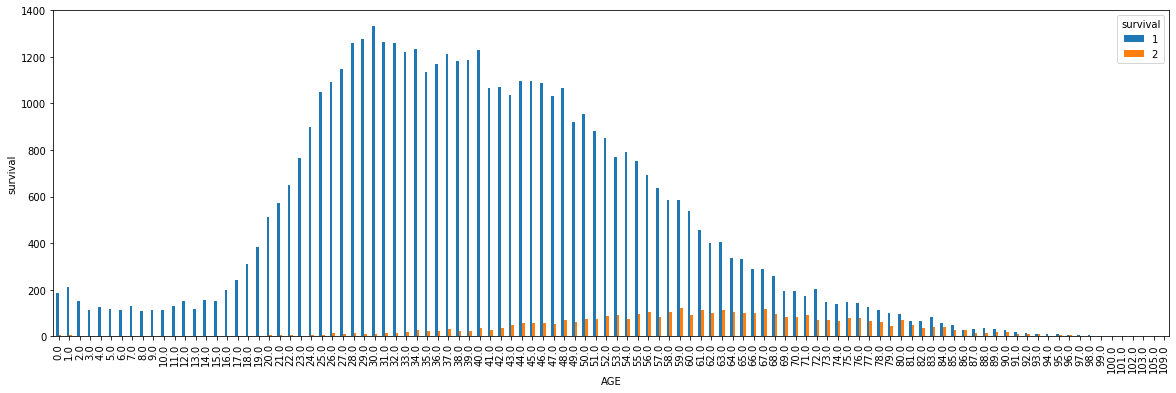

In [142]:
pd.crosstab(df_2.AGE,df_2.survival).plot(kind="bar", figsize=(20, 6))
plt.xlabel('AGE')
plt.ylabel('survival')
plt.show()

Можно увидеть, что молодые практически не умирают. Основыне смерти приходятся на возраст с 40 до 80.

### Категориальный признак DIABETES

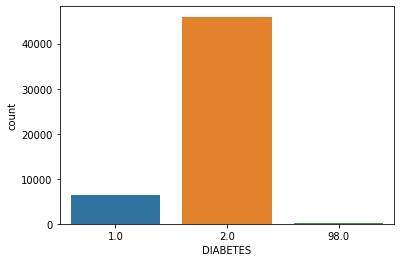

In [143]:
sns.countplot(x="DIABETES", data=df_2)
plt.show()

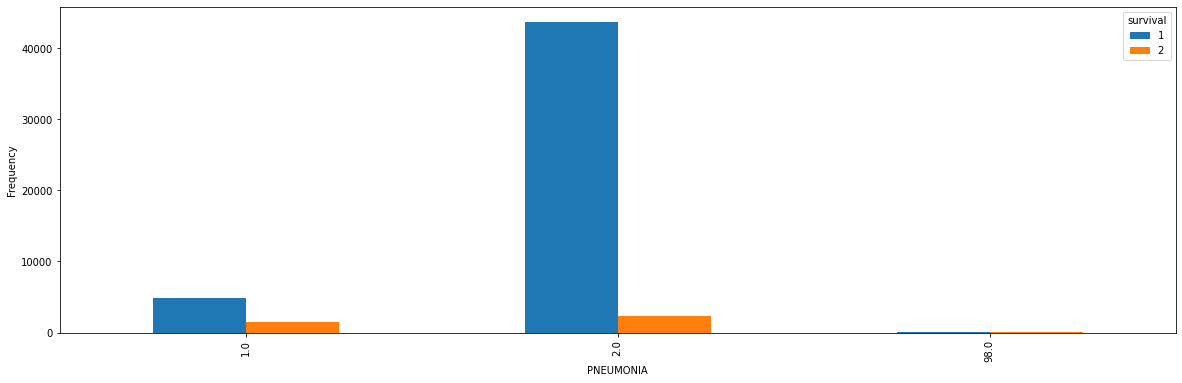

In [144]:
pd.crosstab(df_2.DIABETES,df_2.survival).plot(kind="bar", figsize=(20, 6))
plt.xlabel('PNEUMONIA')
plt.ylabel('Frequency')
plt.show()

По графику можно заметить, что диабет увеличивает шансы умереть при данной болезни.

### Категориальный признак HIPERTENSION

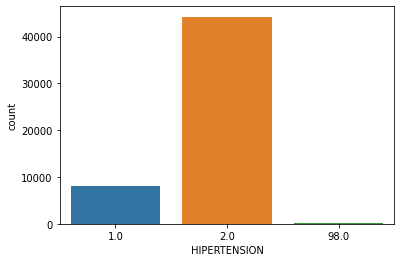

In [145]:
sns.countplot(x="HIPERTENSION", data=df_2)
plt.show()

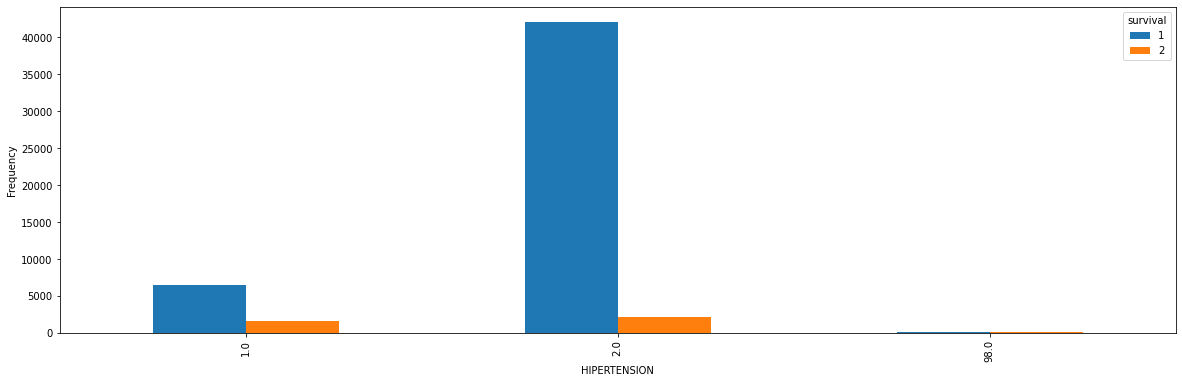

In [146]:
pd.crosstab(df_2.HIPERTENSION,df_2.survival).plot(kind="bar", figsize=(20, 6))
plt.xlabel('HIPERTENSION')
plt.ylabel('Frequency')
plt.show()

По графику можно заметить, что гипертония увеличивает шансы умереть при данной болезни.

### Категориальный признак OBESITY

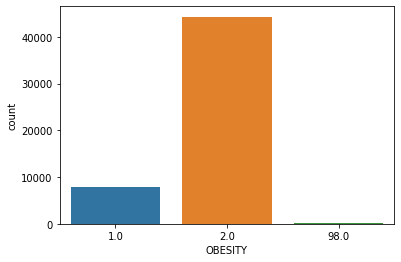

In [147]:
sns.countplot(x="OBESITY", data=df_2)
plt.show()

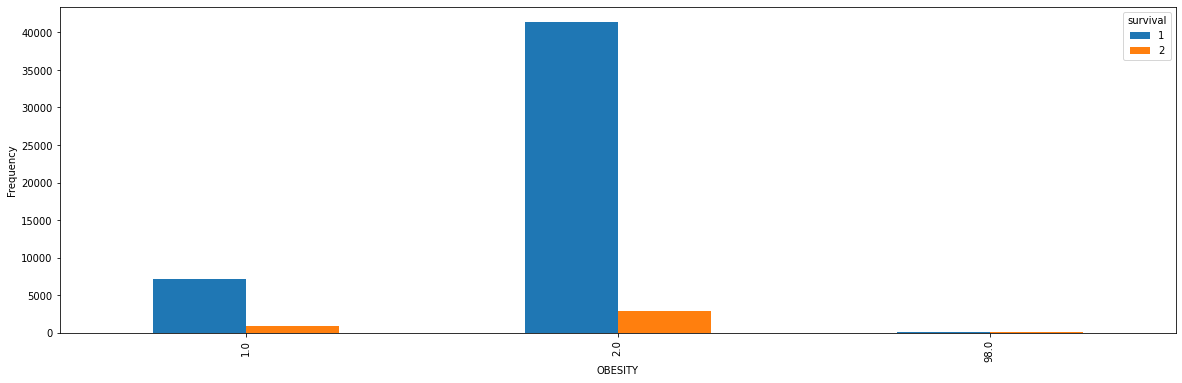

In [148]:
pd.crosstab(df_2.OBESITY,df_2.survival).plot(kind="bar", figsize=(20, 6))
plt.xlabel('OBESITY')
plt.ylabel('Frequency')
plt.show()

Можно заметить, что ожирение увеличивает шансы умереть, но незначительно.

### Категориальный признак TOBACCO

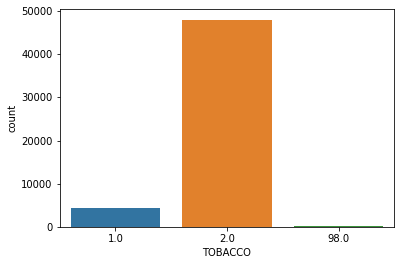

In [149]:
sns.countplot(x="TOBACCO", data=df_2)
plt.show()

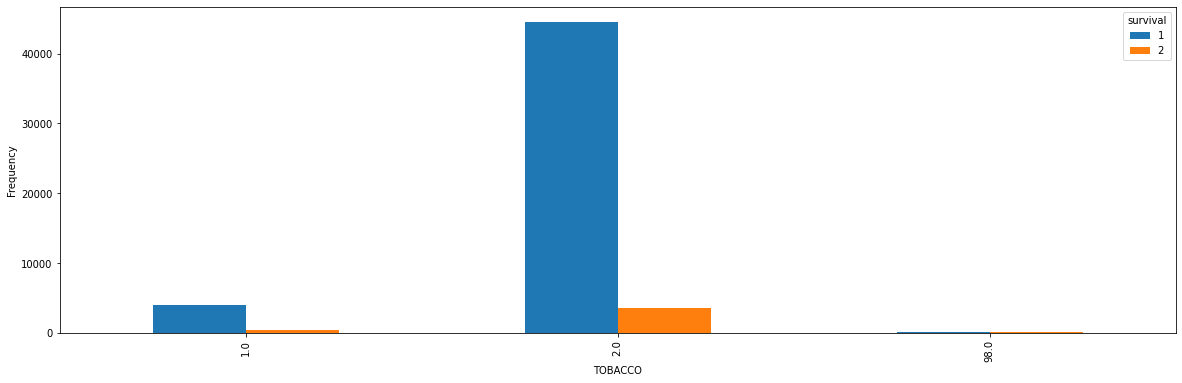

In [150]:
pd.crosstab(df_2.TOBACCO,df_2.survival).plot(kind="bar", figsize=(20, 6))
plt.xlabel('TOBACCO')
plt.ylabel('Frequency')
plt.show()

Можно сказать, что курение практически не влияет на возможность умереть.

### Категориальный признак CLASIFFICATION_FINAL

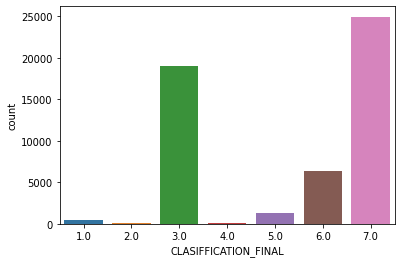

In [151]:
sns.countplot(x="CLASIFFICATION_FINAL", data=df_2)
plt.show()

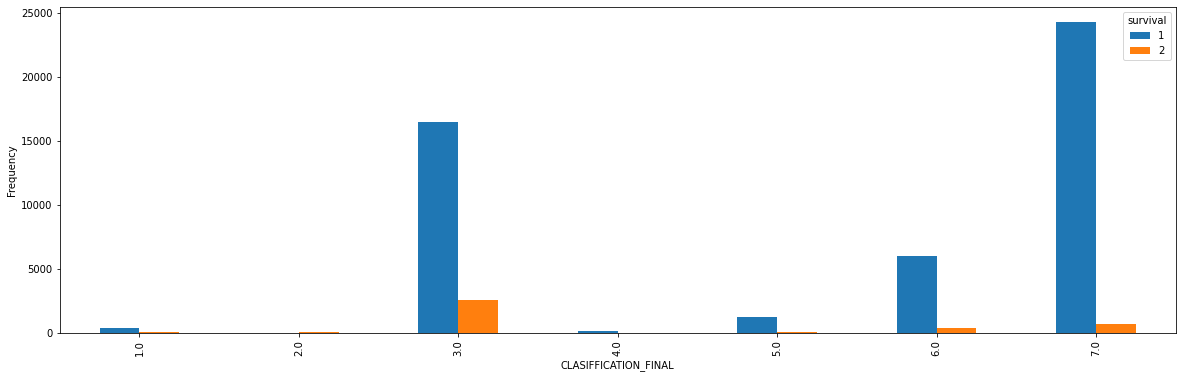

In [152]:
pd.crosstab(df_2.CLASIFFICATION_FINAL,df_2.survival).plot(kind="bar", figsize=(20, 6))
plt.xlabel('CLASIFFICATION_FINAL')
plt.ylabel('Frequency')
plt.show()

Можно увидеть, что убольшинства тесты на ковид дали отрицательный результат, но это не гарантировало, что они выживут.

## Удаление не нужных колонок

Так как мы создали новый признак survival, то можно удалить дату смерти

In [170]:
df_2.drop(['DATE_DIED'], axis=1, inplace=True)

Сохраним изменение в данные

In [171]:
df_2.to_csv('newCovid.csv')